# Working with Decision Trees

In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()

In [3]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
#checking null values

data1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

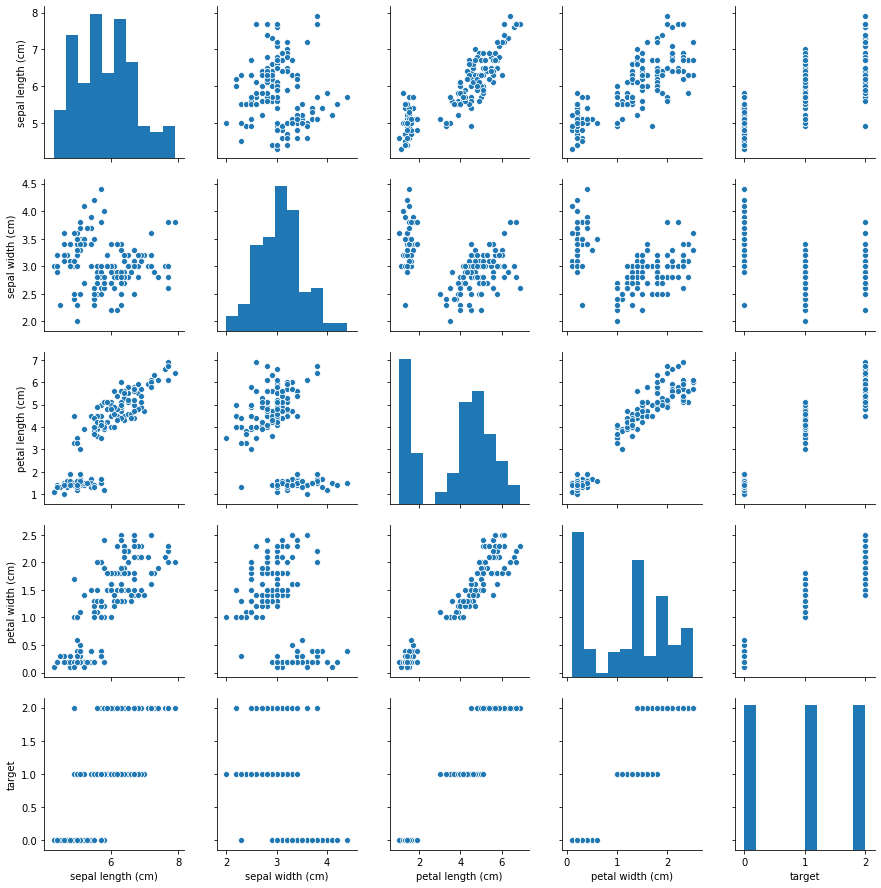

In [6]:
sns.pairplot(data1)

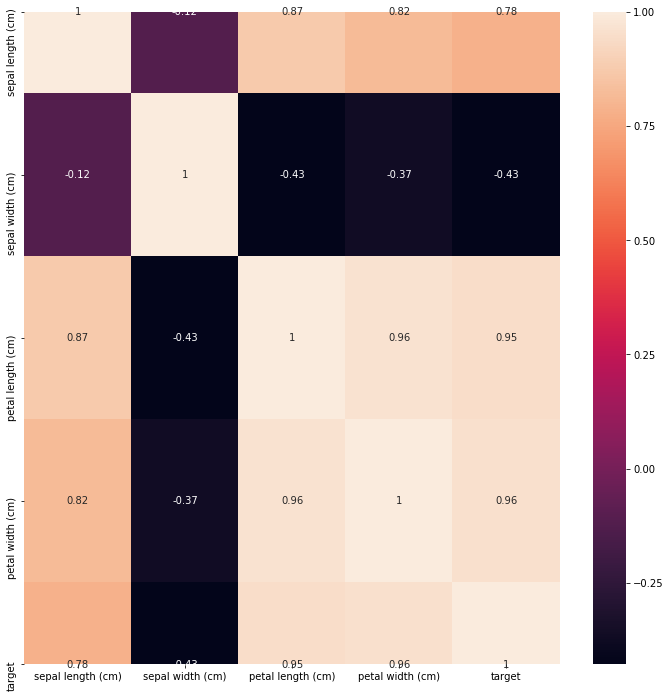

In [7]:
corr_matrix = data1.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)

# Visualizing the Decision Tree

In [13]:
X= data1.drop(columns = ['target'])
Y= data1['target']
X.shape
Y.shape
X = np.array(X)
Y = np.array(Y)
Y=Y.reshape(-1,1)

In [14]:
X 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
Y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [21]:
X_train

array([[4.9, 3. , 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.1, 2.9, 4.7, 1.4],
       [6.2, 3.4, 5.4, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 2.8, 4.1, 1.3],
       [6.7, 3.3, 5.7, 2.5],
       [4.4, 3. , 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [4.9, 3.1, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.7, 1.5, 0.4],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [4.6, 3.4, 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [7.2, 3.6, 6.1, 2.5],
       [6. , 2.2, 4. , 1. ],
       [5.9, 3. , 5.1, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [6. , 3.4, 4.5, 1.6],
       [5.4, 3.4, 1.5, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [5.5, 2.5, 4. , 1.3],
       [4.8, 3. , 1.4, 0.3],
       [7.3, 2

In [22]:
Y_train

array([[0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],

In [23]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(X_train, Y_train)
accuracy_DecisionTree = DecisionTree_model.score(X_test, Y_test)
accuracy_DecisionTree

0.9777777777777777

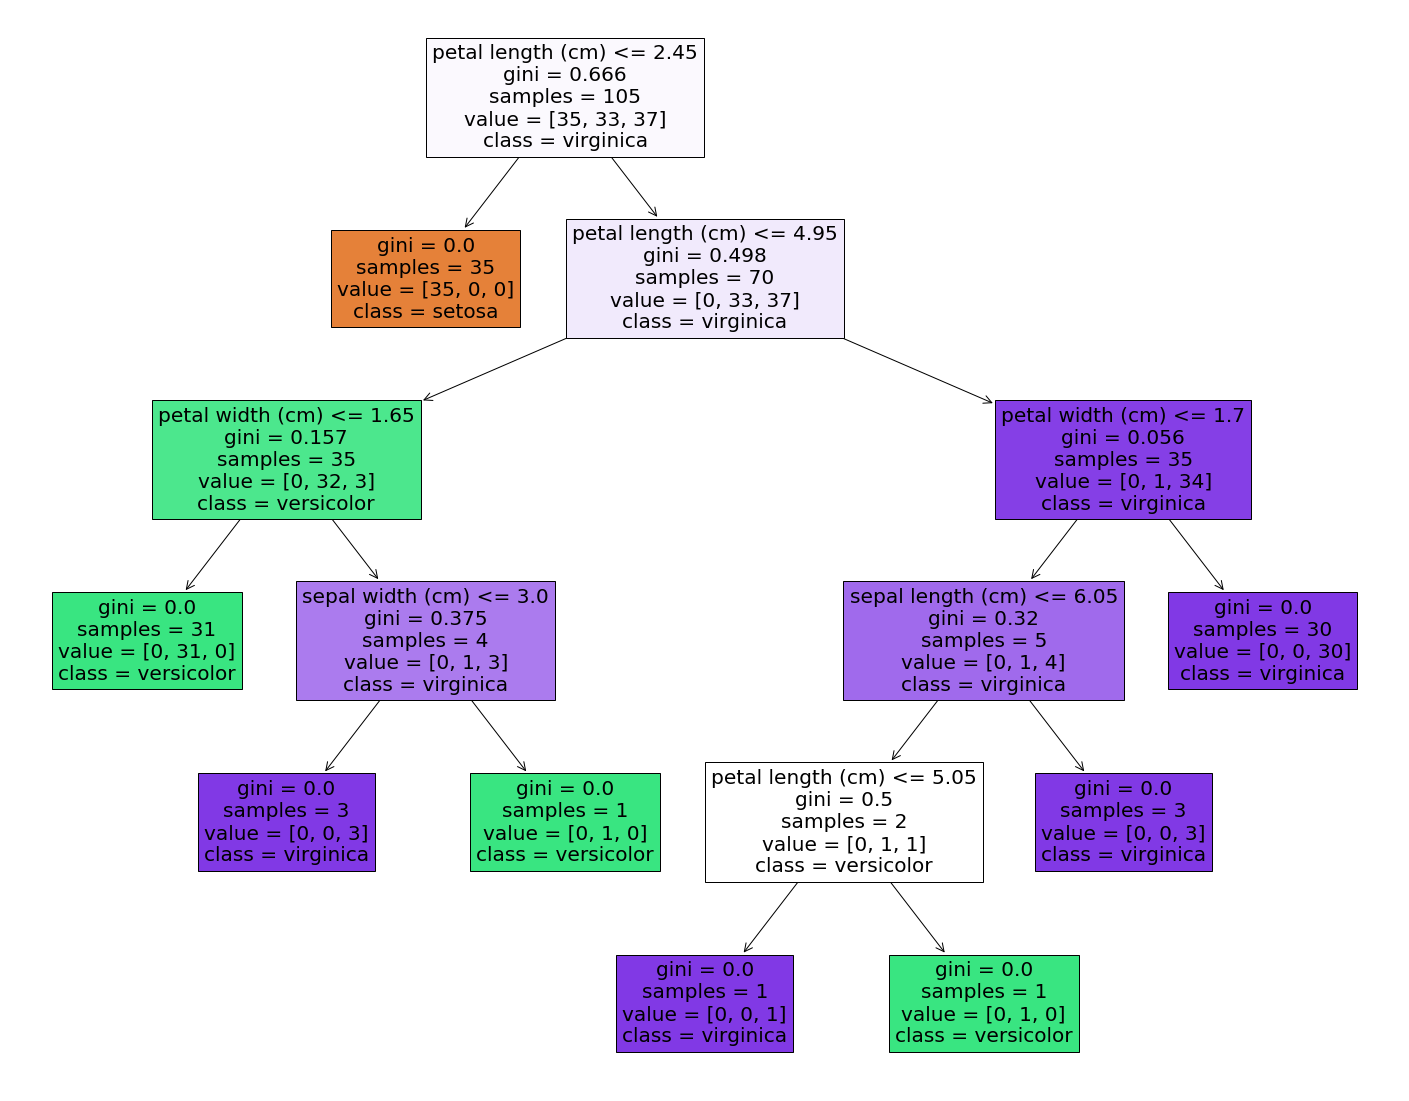

In [25]:
# Visualize the graph
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree_model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)